Single feature model
One way of ranking variables is by the performance returned by a classifier or regression model
trained on a single variable. This procedure works as follows:
1. Train a classifier or regression model utilizing 1 feature.
2. Obtain the performance of the classifier or regression model.
3. Repeat 1 and 2 for every feature in the data.
4. Select the highest ranking features.

Advantages

This procedure is very flexible, because we can use any machine learning model to asses the value
of the features. Thus, we can rank features that have linear and also non-linear relationships with
the target. The method is also suitable for numerical and categorical variables alike. We can rank
features based on any performance metric, like the roc-auc or the accuracy for classification, or the
medium square error (mse) or or root mse for regression.

Limitations

Selecting features based on the performance of a learning algorithm also has some limitations. First,
we need to train one algorithm per feature, so it is more computationally costly than filter methods
based on statistical tests. And second, we still need to decide an arbitrary threshold to select the
top ranking features. In addition, single feature classifiers or regression models do not contemplate
feature interaction. And finally, features selected by 1 model, may not be the best for a different
machine learning algorithm.

In [1]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
import numpy as np

In [7]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import  mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

In [2]:
data = pd.read_csv('train.csv')
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [3]:
data = data.drop_duplicates()

In [4]:
data = data.drop(columns=['number_of_elements'])

In [5]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

X_train.shape, X_test.shape

((14835, 80), (6358, 80))

In [8]:
sel = SelectBySingleFeaturePerformance(
    estimator=DecisionTreeRegressor(random_state=10),
    scoring='neg_mean_squared_error',
    cv=3,
    threshold=None,
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=DecisionTreeRegressor(random_state=10),
                                 scoring='neg_mean_squared_error')

In [9]:
sel.features_to_drop_

['wtd_mean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'wtd_entropy_atomic_mass',
 'wtd_range_atomic_mass',
 'wtd_std_atomic_mass',
 'wtd_mean_fie',
 'wtd_gmean_fie',
 'wtd_entropy_fie',
 'wtd_range_fie',
 'wtd_std_fie',
 'wtd_mean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'wtd_entropy_atomic_radius',
 'wtd_range_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_mean_Density',
 'wtd_gmean_Density',
 'wtd_entropy_Density',
 'wtd_range_Density',
 'wtd_std_Density',
 'wtd_mean_ElectronAffinity',
 'wtd_gmean_ElectronAffinity',
 'wtd_entropy_ElectronAffinity',
 'wtd_range_ElectronAffinity',
 'wtd_std_ElectronAffinity',
 'wtd_mean_FusionHeat',
 'wtd_gmean_FusionHeat',
 'wtd_entropy_FusionHeat',
 'wtd_range_FusionHeat',
 'wtd_std_FusionHeat',
 'wtd_mean_ThermalConductivity',
 'wtd_gmean_ThermalConductivity',
 'wtd_entropy_ThermalConductivity',
 'wtd_range_ThermalConductivity',
 'wtd_entropy_Valence',
 'range_Valence',
 'wtd_range_Valence',
 'wtd_std_Valence']

Text(0.5, 1.0, 'Univariate performance')

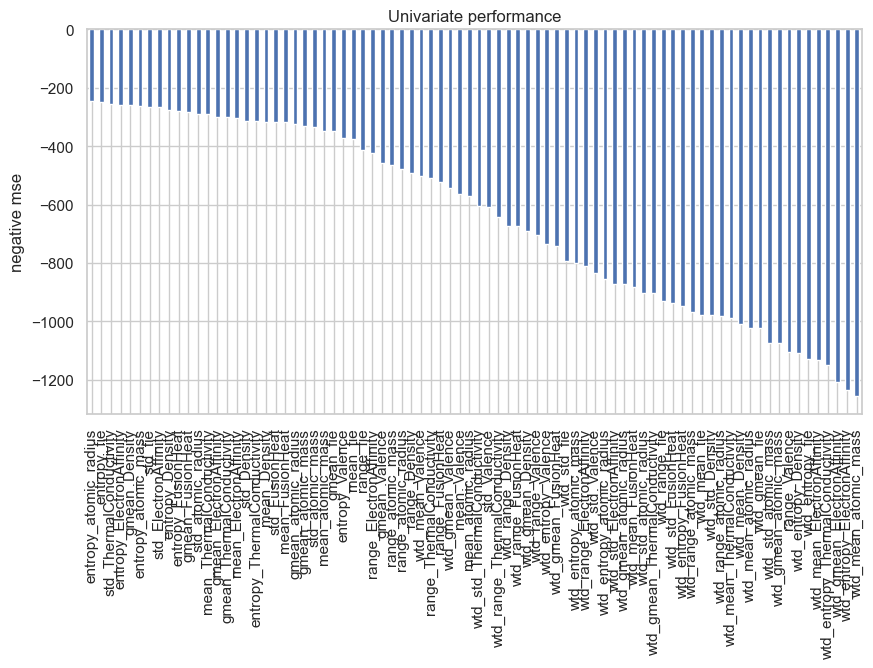

In [10]:
pd.Series(sel.feature_performance_
          ).sort_values(ascending=False
                        ).plot.bar(figsize=(10, 5))

plt.ylabel('negative mse')
plt.title('Univariate performance')

In [11]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((14835, 42), (6358, 42))

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_t)

X_test_sc=min_max_scaler.fit_transform(X_test_t)

In [ ]:
scaler = preprocessing.MinMaxScaler()
y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_sc = scaler.fit_transform(y_test.values.reshape(-1, 1))

In [16]:
list_of_models = [        
        RandomForestRegressor(),
        XGBRegressor(),
        KNeighborsRegressor(),
        LGBMRegressor(),
        SVR()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=30,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                        fit_time  score_time  neg_mean_squared_error
RandomForestRegressor  55.067206    0.035638               -0.004734
XGBRegressor            8.561042    0.004510               -0.005237
KNeighborsRegressor     0.008538    0.086125               -0.006599
LGBMRegressor           1.006517    0.006787               -0.005795
SVR                     7.371103    0.423999               -0.011125


In [17]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model_rf.fit(X_train_sc, y_train_sc)

# Make predictions on the test data
y_pred_rf = model_rf.predict(X_test_sc)

# Calculate R2 score
r2_rf = r2_score(y_test_sc, y_pred_rf)
print("R2 score:", r2_rf)

# Calculate MAE
mae_rf = mean_absolute_error(y_test_sc, y_pred_rf)
print("MAE:", mae_rf)

C:\Users\Margarita\AppData\Local\Temp\ipykernel_20912\772768535.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train_sc, y_train_sc)


R2 score: 0.7108441868118022
MAE: 0.06598837577623658
